# Laborator 5: Extragerea contururilor

## Scopul lucrarii
Intr-o imagine, variatiile de valoare ale pixelilor reprezinta schimbari ale proprietatilor fizice sau geometrice ale scenei sau ale obiectului observat. Aceste schimbari pot corespunde fizic la variatiile iluminarii, schimbarile de orientare sau de distanta fata de observator, schimbari de reflectanta ale suprafetelor, variatii de absorbtie a radiatiei. Intr-un
numar mare de cazuri, aceste variatii de intensitate sunt informatii importante pentru operatiile ce urmeaza segmentarii, informatii ce corespund frontierelor regiunilor determinate de obiectele scenei.

Scopul acestei lucrari este de a realiza familiarizarea cu tehnicile de extragere a contururilor bazate pe gradient si pe Laplacian. De asemenea se discuta despre evaluarea calitatii unui extractor de contur

## Metoda de gradient
Principiul acestei metode consta in definirea punctelor de contur ca fiind acei pixeli ai imaginii in care apar schimbari importante (abrupte) ale nivelului de gri. Deci, masurarea acestei variatii se va face prin operatori derivativi de tip gradient. Pentru o imagine cu suport spatial continuu, pe directia unei muchii, derivata va fi maxima. Derivata imaginii pe directia $r$, ce face unghiul $\theta $ cu orizontala, este data de combinatia liniara a derivatelor partiale pe directiile orizontala si verticala:
\begin{equation}
\frac{\partial f}{\partial r}=\frac{\partial f}{\partial x}\frac{\partial x}{\partial r}+\frac{\partial f}{\partial y}\frac{\partial y}{\partial r}=\frac{\partial f}{\partial x}\cos \theta +\frac{\partial f}{\partial y}\sin \theta
\end{equation}

\begin{equation}
\frac{\partial f}{\partial r}=f_{x}\cos \theta +f_{y}\sin \theta
\end{equation}

Valoarea maxima a acestei derivate, calculate dupa unghiul $\theta$ este data de ecuatia
\begin{equation}
\frac{\partial}{\partial \theta }\left( \frac{\partial f}{\partial r} \right) =-f_{x}\sin \theta +f_{y}\cos \theta =0 \end{equation}

Ecuatia anterioara are solutia evidenta:
\begin{equation}
\theta _{0}=\arctan \left( \frac{f_{y}}{f_{x}}\right)
\end{equation}

Pe aceasta directie, modulul gradientului este:
\begin{equation}
\left( \frac{\partial f}{\partial r}\right) _{\max }=\sqrt{f_{x}^{2}+f_{y}^{2}}
\end{equation}

Din punct de vedere practic, implementarea acestei metode impune calcularea, pentru fiecare punct al imaginii, a derivatelor partiale $f_{x}$ si $f_{y}$, calcularea modulului gradientului maxim si a directiei acestuia. Valoarea gradientului maxim din fiecare punct al imaginii este apoi comparata cu un prag fixat: daca pragul este depasit (deci gradientul maxim in pixelul respectiv este suficient de important) atunci pixelul testat este pixel de contur.

Putem avea mai multe expresii simple, imediate, ale derivatelor pe orizontala si verticala:
\begin{equation}
f_{x}=f(m,n)-f(m+1,n),\,f_{y}=f(m,n)-f(m,n+1)
\end{equation}
\begin{equation}
f_{x}=f(m-1,n)-f(m,n),\,f_{y}=f(m,n-1)-f(m,n)
\end{equation}
\begin{equation}
f_{x}=f(m-1,n)-f(m+1,n),\,f_{y}=f(m,n-1)-f(m,n+1)
\end{equation}


## Ce vom coda
o schema simpla de calcul al gradientilor fundamentali, calculul intensitatii maxime de tranzitie si praguirea acesteia pentru a determina harta binara de contururi.

(300, 400)


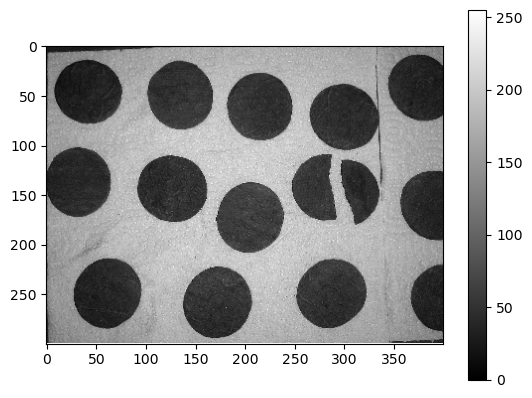

(301, 401)


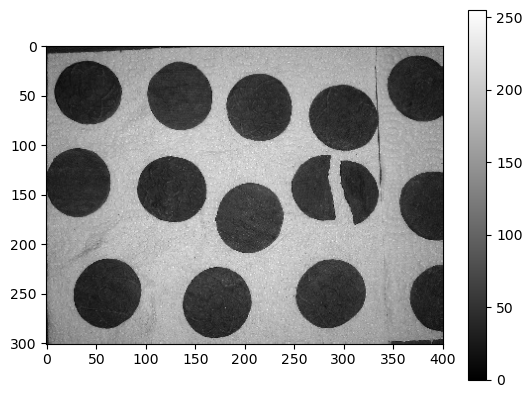

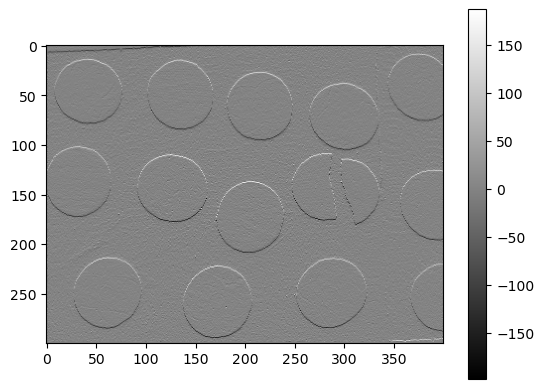

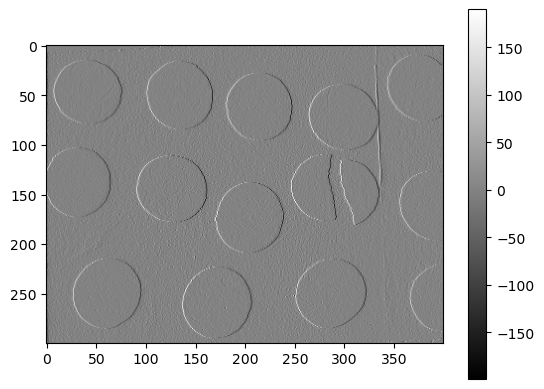

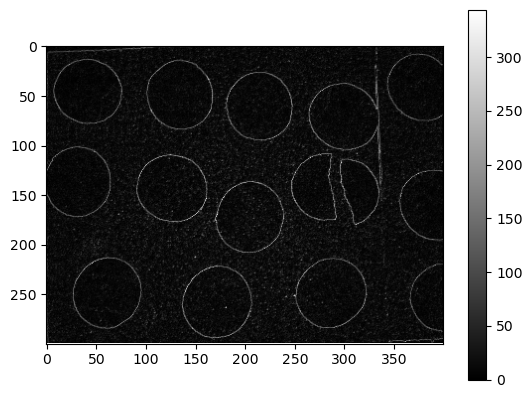

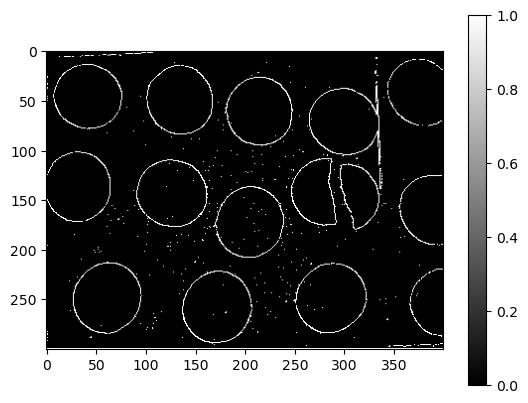

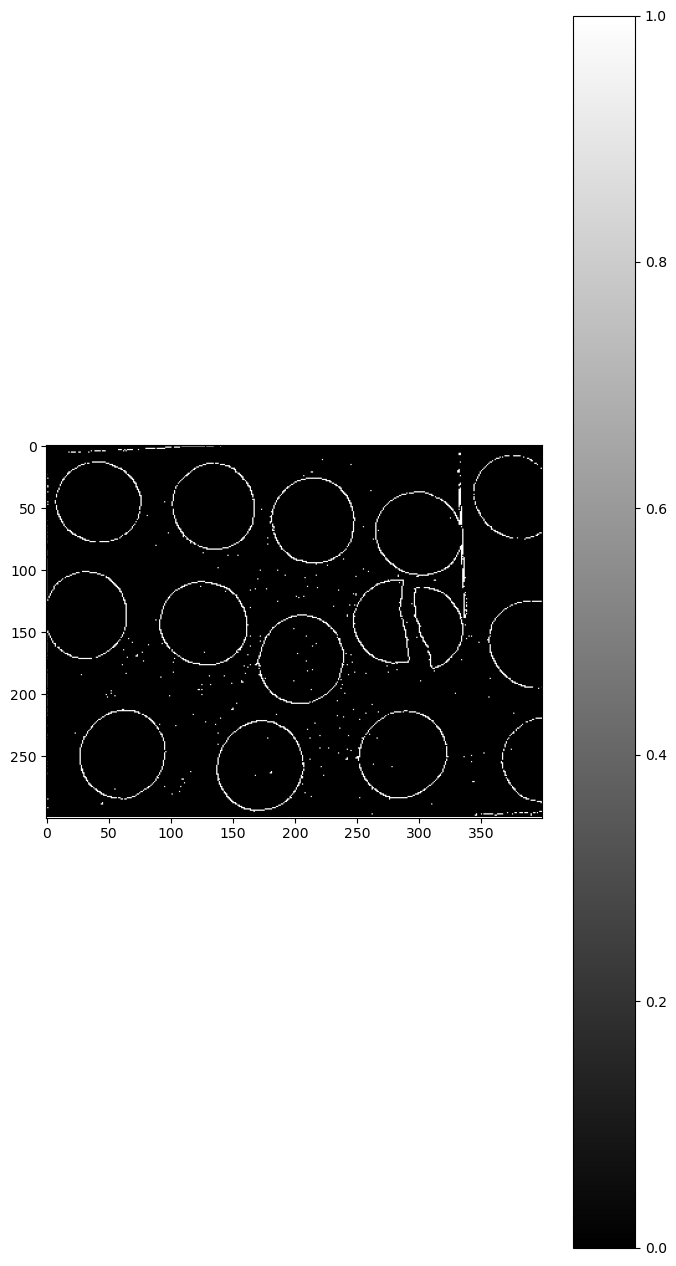

(<Figure size 800x1600 with 2 Axes>,
 None)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster,datasets
from skimage import io,color,measure
import matplotlib as mpl
from scipy import signal

plt.close('all')

######################## 1) Metoda de gradient ############
##### extragere contur in caz ideal - img fara zgomot

L=256
img=io.imread('biscuiti.jpg')
dims=np.shape(img)
print(dims)

Lines=dims[0]
Columns=dims[1]

Y=img[0:Lines,0:Columns]
plt.figure(),plt.imshow(Y,cmap='gray'),plt.colorbar(),plt.show()

#Y=100*np.ones([Lines, Columns])
#Y[100:150,100:150]=200

#bordare pe ultima linie si coloana
YY=np.zeros([Lines+1, Columns+1])   
YY[0:Lines,0:Columns]=Y             # -> pune in YY img copiata in Y
YY[Lines,0:Columns]=Y[Lines-1,:]    # -> copiaza (bordeaza) ultima linie
YY[0:Lines,Columns]=Y[:,Columns-1]  # -> copiaza (bordeaza) ultima coloana
YY[Lines,Columns]=Y[Lines-1,Columns-1]  # -> ataseaza liniile/coloanele bordate
print(np.shape(YY))
plt.figure(),plt.imshow(YY,cmap='gray'),plt.colorbar(),plt.show()


# derivatele pe orizontala si verticala:
fx=np.zeros([Lines, Columns])
fy=np.zeros([Lines, Columns])

for l in range(0,Lines):
    for c in range(0,Columns):
        fx[l,c]=YY[l,c]-YY[l+1,c]
        
for l in range(0,Lines):
    for c in range(0,Columns):        
        fy[l,c]=YY[l,c]-YY[l,c+1]


        
plt.figure(),plt.imshow(fx,cmap='gray'),plt.colorbar(),plt.show() #evidentiaza conturul pe Orizontala
plt.figure(),plt.imshow(fy,cmap='gray'),plt.colorbar(),plt.show() #evidentiaza conturul pe Verticala

gradY=np.abs(fx)+np.abs(fy)  #evidentiaza tot conturul
plt.figure(),plt.imshow(gradY,cmap='gray'),plt.colorbar(),plt.show()

# Harta binara de contururi
plt.figure(),plt.imshow(gradY>75,cmap='gray'),plt.colorbar(),plt.show() # face conturul cu alb

# Harta binara de contururi
plt.figure(figsize=(8,16)),plt.imshow(gradY>80,cmap='gray'),plt.colorbar(),plt.show()
#! gradY>90  variezi 90 ca sa dispara punctele care nu s biscuiti!!


## Ce se intampla in conditii de zgomot?

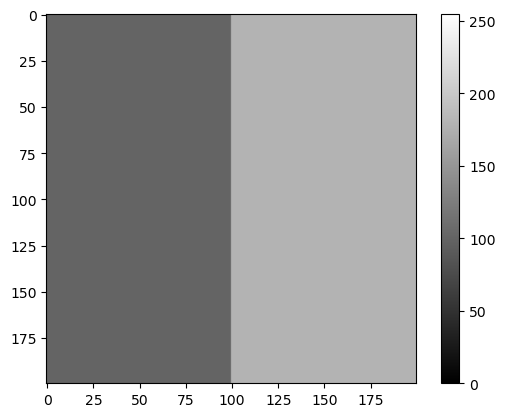

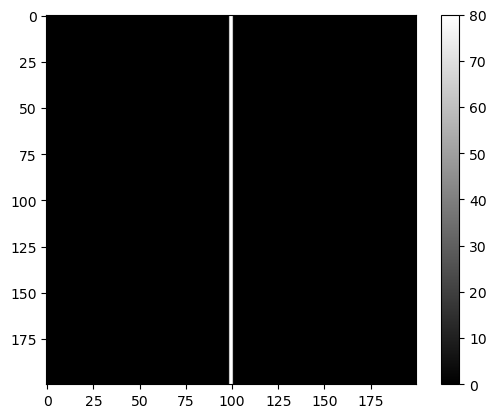

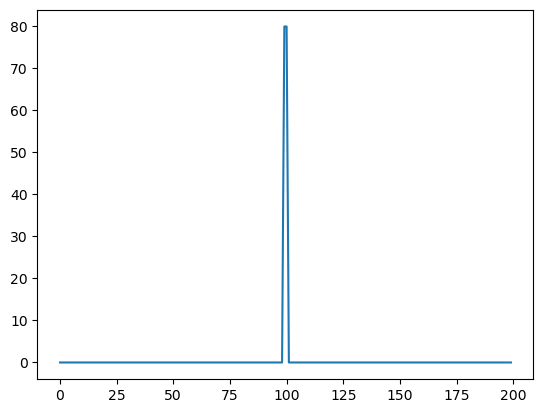

[ 0. 80. 80.  0.]


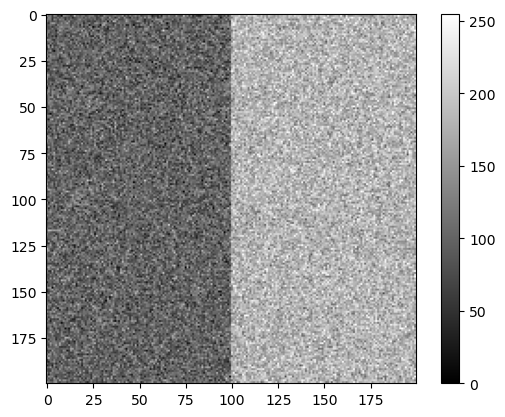

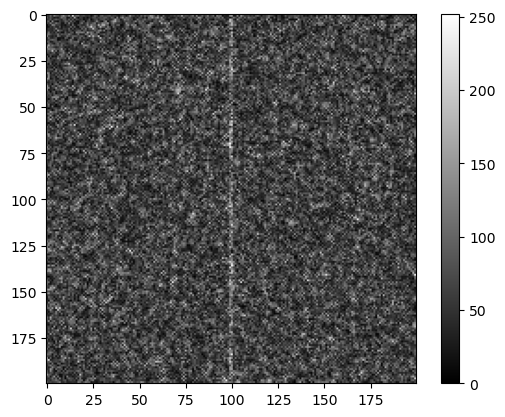

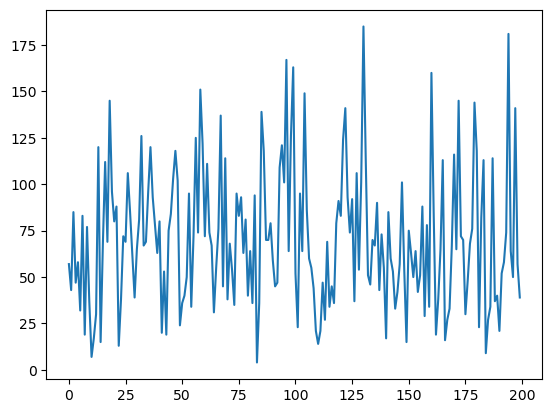

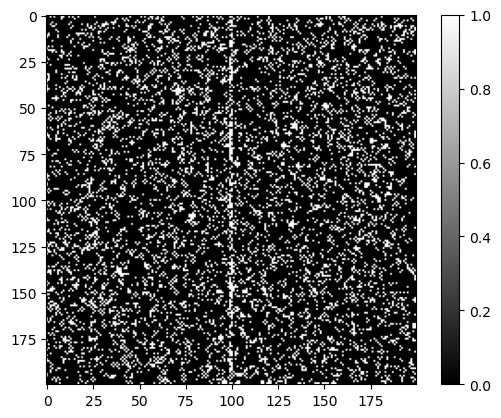

[False False False False]


In [3]:
##### extragere contur in caz ne-ideal - img cu zgomot

L=256

# Aici fac o imagine ideala
Y = 100*np.ones([200,200])
Y[:,100:200]=180

MASK = np.zeros([200,200])
MASK[:,99:101]=1

# aici adaug zgomot imaginii ideale de luminanta 100
dims=np.shape(Y)
Lines=dims[0]
Columns=dims[1]

N=np.random.normal(0,30,[Lines,Columns])
Yzg=Y+N
for i in range(0,Lines):
    for j in range(0, Columns):
        if (Yzg[i,j]>L-1):
            Yzg[i,j]=L-1
        else:
            if (Yzg[i,j]<0):
                Yzg[i,j]=0

Yzg=np.uint8(Yzg)


plt.figure(),plt.imshow(Y,cmap='gray',vmin=0,vmax=255),plt.colorbar(),plt.show()

fx=signal.convolve2d(Y,np.array([[0,-1,0],[0,0,0],[0,1,0]]),boundary='symm', mode='same')
fy=signal.convolve2d(Y,np.array([[0,0,0],[-1,0,1],[0,0,0]]),boundary='symm', mode='same')
gradY=np.abs(fx)+np.abs(fy)
     
plt.figure(),plt.imshow(gradY,cmap='gray'),plt.colorbar(),plt.show()
plt.figure(),plt.plot(gradY[100,:]),plt.show()

print(gradY[100,98:102])

plt.figure(),plt.imshow(Yzg,cmap='gray'),plt.colorbar(),plt.show()
fzx=signal.convolve2d(Yzg,np.array([[0,-1,0],[0,0,0],[0,1,0]]),boundary='symm', mode='same')
fzy=signal.convolve2d(Yzg,np.array([[0,0,0],[-1,0,1],[0,0,0]]),boundary='symm', mode='same')
gradYzg=np.abs(fzx)+np.abs(fzy)
     
plt.figure(),plt.imshow(gradYzg,cmap='gray'),plt.colorbar(),plt.show()
plt.figure(),plt.plot(gradYzg[100,:]),plt.show()
plt.figure(),plt.imshow(gradYzg>100,cmap='gray'),plt.colorbar(),plt.show()
print(gradYzg[100,98:102]>170)

## Gradientul netezit
Folosirea mastilor de derivare pe verticala si orizontala prezentate are insa serioase neajunsuri: dimensiunea lor mica face ca rezultatele sa fie extrem de sensibile la zgomot. In aceste conditii a aparut naturala ideea de a combina filtrarea de derivare cu o filtrare de netezire, care sa mai reduca efectele zgomotului. Considerand zgomotul de tip gaussian, aditiv, filtrarea de netezire are ca efect secundar micsorarea contrastului frontierelor obiectelor din imagine (efectul de incetosare, sau blur). Pentru ca in aceste conditii detectia contururilor sa nu fie afectata, trebuie ca operatia de mediere prin care se realizeaza netezirea sa se faca pe o directie perpendiculara directiei contururilor cautate.
Atunci derivarea pe verticala se combina cu o operatie de netezire cu masca orizontala
$\left(
\begin{array}{lll}
1/3 & \frame{1/3} & 1/3
\end{array}
\right)$
si derivarea pe orizontala se combina cu o operatie de netezire cu masca verticala
$\left(
\begin{array}{l}
1/3 \\
\frame{1/3} \\
1/3
\end{array}
\right)$.

In cazul general se pot folosi Insa pentru netezire medieri ponderate (si nu neaparat medieri aritmetice), care sa acorde o mai mare importanta pixelului curent prelucrat, ca de exemplu
$\frac{1}{c+2}\left(
\begin{array}{lll}
1 & \frame{c} & 1
\end{array}
\right) $

si se prefera folosirea operatorilor de derivare simetrici. Ceea ce rezulta pentru operatorii de derivare orizontala si verticala sunt mastile:
$
W_{x}=\left(
\begin{array}{lll}
1 & 0 & -1 \\
c & \frame{0} & -c \\
1 & 0 & -1
\end{array}
\right) $
$W_{y}=\left(
\begin{array}{lll}
1 & c & 1 \\
0 & \frame{0} & 0 \\
-1 & -c & -1
\end{array}
\right)$

Prin particularizarea valorilor constantei de ponderare $c$ se pot obtine diferite tipuri de operatori de extragere de contur clasici: Prewitt ($c=1$), Izotrop ($c=\sqrt{2}$), Sobel ($c=2$). Se remarca faptul ca constanta de ponderare globala a mastii de filtare este neesentiala, Intrucat conditia de normare ce trebuie Indeplinita este cea pentru filtre de contrastare (derivare): suma coeficientilor mastii sa fie nula.

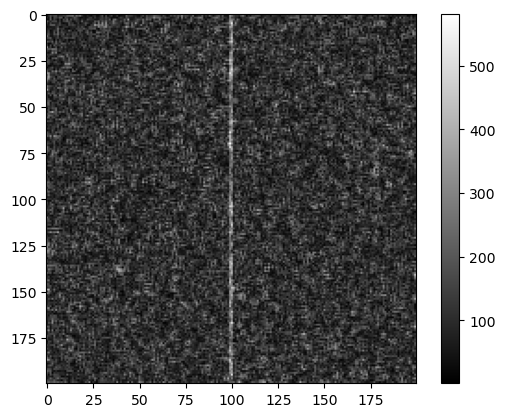

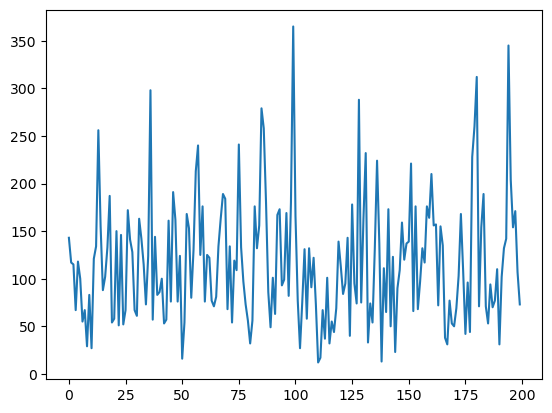

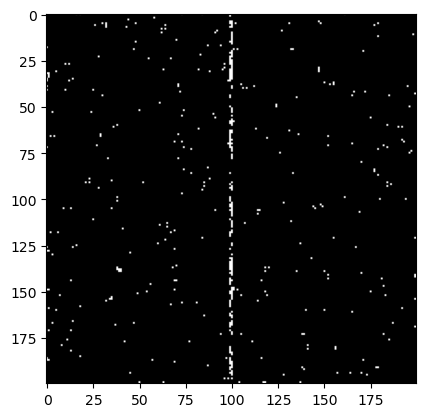

(<Figure size 640x480 with 1 Axes>,
 None)

In [4]:
## Prewitt -> c=1
## Izotrop -> c=sqrt 2
## Sobel -> c=2
#fzx=signal.convolve2d(Yzg,np.array([[-1,-c,-1],[0,0,0],[1,c,1]]),boundary='symm', mode='same')
#fzy=signal.convolve2d(Yzg,np.array([[-1,0,1],[-c,0,c],[-1,0,1]]),boundary='symm', mode='same')

c=1
fzx_net=signal.convolve2d(Yzg,np.array([[-1,-c,-1],[0,0,0],[1,c,1]]),boundary='symm', mode='same')
fzy_net=signal.convolve2d(Yzg,np.array([[-1,0,1],[-c,0,c],[-1,0,1]]),boundary='symm', mode='same')
gradYzg=np.abs(fzx_net)+np.abs(fzy_net)
     
plt.figure(),plt.imshow(gradYzg,cmap='gray'),plt.colorbar(),plt.show()
plt.figure(),plt.plot(gradYzg[100,:]),plt.show()

plt.figure(),plt.imshow(gradYzg>300,cmap='gray'),plt.show()



## Unde pun pragul de segmentare al hartii de contururi?

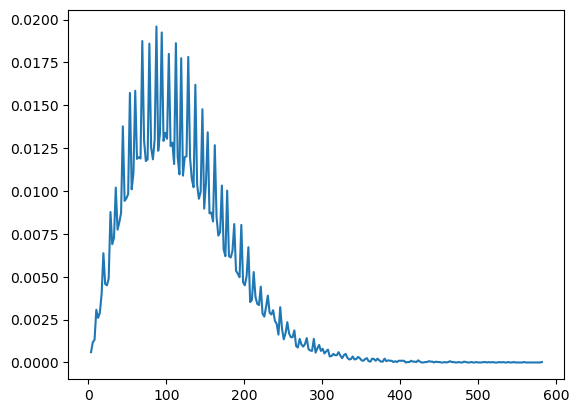

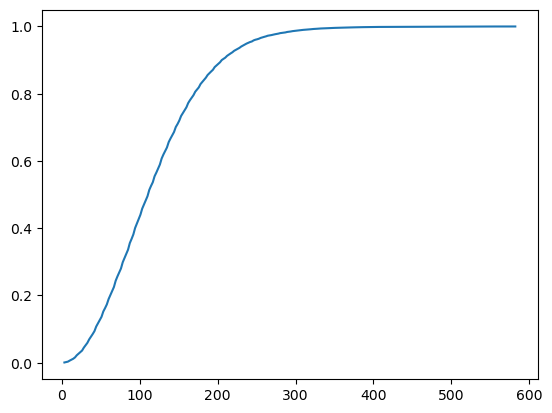

135
307.38671875


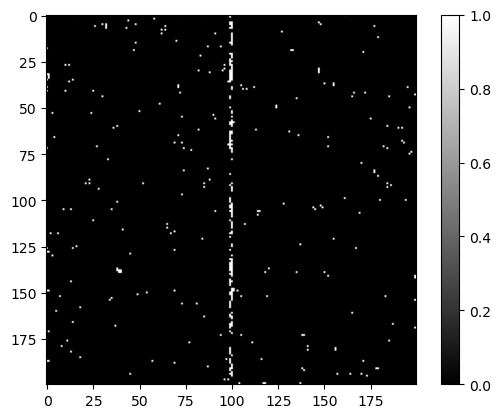

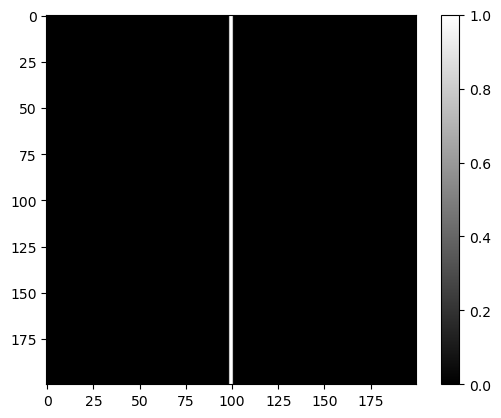

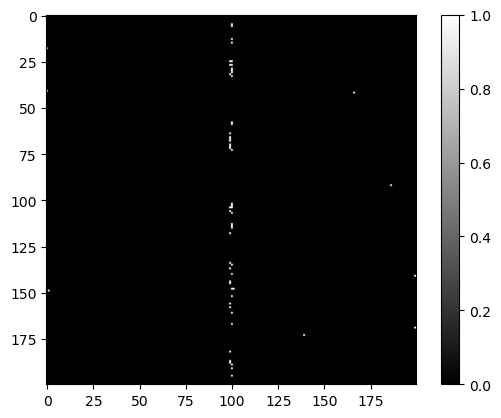

0.8387095421436221
0.1299999967500001


In [5]:
from numpy import ndarray as npnd
hhh=np.histogram(npnd.flatten(gradYzg),256,density=True)

histo=hhh[0]/np.sum(hhh[0])
h=hhh[1]

#plt.figure(),plt.plot(h[1:],hhh[0]),plt.show()
plt.figure(),plt.plot(h[1:],histo),plt.show()
#print(histo)

# voi alege drept contur 1% dintre punctele imaginii = segmentare pe histograma cumulativa
H=np.cumsum(histo)
#print(H)
plt.figure(),plt.plot(h[1:],H),plt.show()

prag=np.argmin(np.abs(H-0.99))
print(prag)
print(h[prag])
# np.abs(H - 0.99) calculează diferența absolută între histograma cumulativă și 0.99.
# np.argmin(...) găsește indicele la care această diferență este minimă, adică indicele pentru care histograma cumulativă este cea mai aproape de 0.99.
# h[prag] dă valoarea efectivă a gradientului corespunzătoare acestui indice, care este pragul de segmentare.


#afisarea img segmentate folosing pragul calculat
plt.figure(),plt.imshow(gradYzg>h[prag],cmap="gray"),plt.colorbar(),plt.show()
# gradYzg > h[prag] creează o hartă binară unde punctele cu valori mai mari decât pragul sunt setate la True (1) și celelalte la False (0).
# plt.imshow(...) afișează această hartă binară

#testarea unui prag fix de segmentare
TEST = gradYzg>h[prag]
TEST = gradYzg>400

MASK = np.zeros([200,200])
MASK[:,99:101]=1

plt.figure(),plt.imshow(MASK,cmap="gray"),plt.colorbar(),plt.show()
plt.figure(),plt.imshow(TEST,cmap="gray",),plt.colorbar(),plt.show()

def my_precrec(MASK, SEGM):
    epsilon=0.00001
    TP=SEGM*MASK
    FP=SEGM*(1-MASK)
    FN=(1-SEGM)*MASK
    prec=np.sum(TP)/(np.sum(TP)+np.sum(FP)+epsilon)
    rec=np.sum(TP)/(np.sum(TP)+np.sum(FN)+epsilon)
    return prec, rec

prec, rec = my_precrec(MASK, TEST)
print(prec)
print(rec)

## Tema: prag calculat adaptiv in harta de intensitati de tranzitie
Sa se codeze extragerea pragului de decizie pixel contur/ non-contur din harta de intensitati de tranzitie folosind criteriul Otsu.

In [7]:
# codati aici

## Filtrul Canny

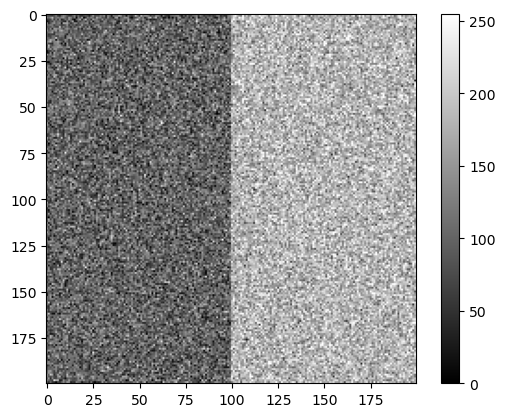

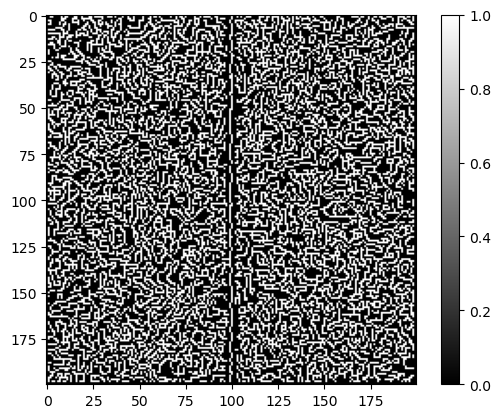

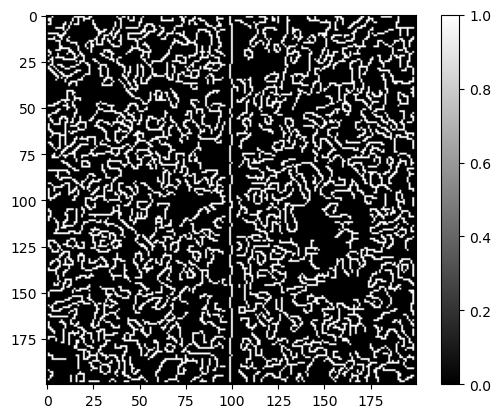

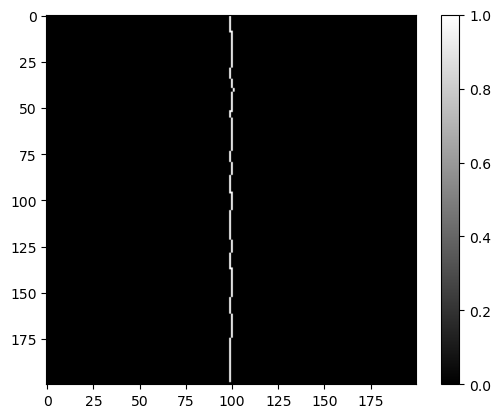

[False False  True False]


In [6]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
L=256

# Aici fac o imagine ideala

Y = 100*np.ones([200,200])
Y[:,100:200]=180

MASK = np.zeros([200,200])
MASK[:,99:101]=1

# aici adaug zgomot imaginii ideale de luminanta
dims=np.shape(Y)
Lines=dims[0]
Columns=dims[1]

Yzg=Y+np.random.normal(0,40,[Lines,Columns])
for i in range(0,Lines):
    for j in range(0, Columns):
        if (Yzg[i,j]>L-1):
            Yzg[i,j]=L-1
        else:
            if (Yzg[i,j]<0):
                Yzg[i,j]=0

Yzg=np.uint8(Yzg)
plt.figure(),plt.imshow(Yzg,cmap='gray'),plt.colorbar(),plt.show()

from skimage import feature
edges1 = feature.canny(Yzg)
edges2 = feature.canny(Yzg, sigma=1.5)
edges3 = feature.canny(Yzg, sigma=3)

plt.figure(),plt.imshow(edges1,cmap='gray'),plt.colorbar(),plt.show()
plt.figure(),plt.imshow(edges2,cmap='gray'),plt.colorbar(),plt.show()
plt.figure(),plt.imshow(edges3,cmap='gray'),plt.colorbar(),plt.show()
print(edges3[100,98:102])

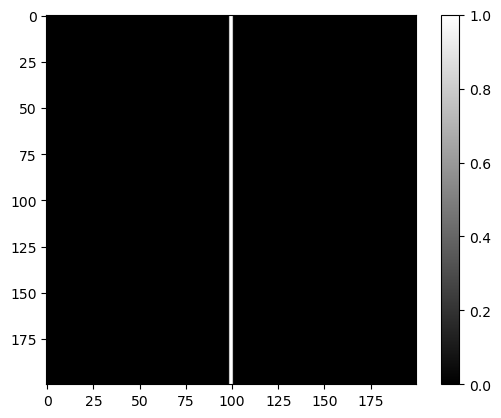

(<Figure size 640x480 with 2 Axes>,
 None)

In [9]:
plt.figure(),plt.imshow(MASK,cmap='gray'),plt.colorbar(),plt.show()

## Calitatea unui extractor de contur
Evident, este necesara o masca binara a conturului ideal.
Teoretic conturul este de IN INTERIORUL FIECAREI REGIUNI situate de o parte si alta a frontierei (deci e gros de doi pixeli). Canny subtiaza conturul in mod explicit (supresia non-maximelor locale) pana la un singur pixel. Acest lucru trebuie avunt in vedere la generarea mastii ideale de contur.

In [7]:
# folosim calculul de precizie si reamintire de la segmentarea pe regiuni
import numpy as np

def my_precrec(MASK, SEGM):
    epsilon=0.00001
    TP=SEGM*MASK
    FP=SEGM*(1-MASK)
    FN=(1-SEGM)*MASK
    prec=np.sum(TP)/(np.sum(TP)+np.sum(FP)+epsilon)
    rec=np.sum(TP)/(np.sum(TP)+np.sum(FN)+epsilon)
    return prec, rec


#print(type(edges3))
#print(edges3.dtype)

prec, rec = my_precrec(MASK, edges1)
print(prec, rec)

prec, rec = my_precrec(MASK, edges2)
print(prec, rec)

prec, rec = my_precrec(MASK, edges3)
print(prec, rec)


0.01387009471321374 0.5124999871875003
0.021979223595430045 0.5024999874375004
0.9900989608861901 0.49999998750000035


In [8]:
import numpy as np

def my_precrec(MASK, SEGM):
    epsilon=0.00001
    TP=SEGM*MASK
    FP=SEGM*(1-MASK)
    FN=(1-SEGM)*MASK
    prec=np.sum(TP)/(np.sum(TP)+np.sum(FP)+epsilon)
    rec=np.sum(TP)/(np.sum(TP)+np.sum(FN)+epsilon)
    return prec, rec


#print(type(edges3))
#print(edges3.dtype)

prec, rec = my_precrec(MASK, edges1)
print(prec, rec)

prec, rec = my_precrec(MASK, edges2)
print(prec, rec)

prec, rec = my_precrec(MASK, edges3)
print(prec, rec)

import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage import feature
L=256

# Aici fac o imagine ideala
JUMI=100
Y = 100*np.ones([2*JUMI,2*JUMI])
Y[:,JUMI:2*JUMI]=180

MASK = np.zeros([2*JUMI,2*JUMI])
MASK[:,JUMI-1:JUMI+1]=1

Yzg=Y+np.random.normal(0,40,[Lines,Columns])
for i in range(0,Lines):
    for j in range(0, Columns):
        if (Yzg[i,j]>L-1):
            Yzg[i,j]=L-1
        else:
            if (Yzg[i,j]<0):
                Yzg[i,j]=0

Yzg=np.uint8(Yzg)

edges1 = feature.canny(Yzg)
edges2 = feature.canny(Yzg, sigma=1.5)
edges3 = feature.canny(Yzg, sigma=3)


0.01387009471321374 0.5124999871875003
0.021979223595430045 0.5024999874375004
0.9900989608861901 0.49999998750000035


### Pratt's Figure of Merit (FOM)
FOM este o masura de tip eroare de localizare, care calculeaza media inverselor distantelor de la fiecare punct de contur detectat la cel mai apropiat punct de contur ideal.

\begin{equation}
FOM = \frac{1}{max(D,I)} \sum_{i=1}^{D} \frac{1}{1+\alpha d_i}
\end{equation}


In [9]:
# vom coda un Pratt FOM pentru imaginea de test cu 2 benzi verticale (STIM UNDE E CONTURUL!)
EDGEMAP=edges1
JUMI=100
alpha=1
FOM=0
for lines in range(0,2*JUMI):
    for c in range(0,2*JUMI):
        if (EDGEMAP[lines,c]):
            FOM+=1/(1+alpha*np.min([np.abs(JUMI-c), np.abs(JUMI-1-c)]))
FOM/=2*JUMI 
# FOM/ = max (2*JUMI, nr puncte din harte de contur masurata)
print(FOM)

3.7954325554128276


## Laplacian si zero-crossing
Unul dintre principalele dezavantaje ale metodelor de gradient este precizia slaba de localizare a conturului (a centrului tranziei) in conditiile unei pante putin abrupte a acestuia (tranzitii slabe, graduale). Derivata a doua poate fi insa folosita pentru a determina capetele tranzitiei (cele doua extreme), sau pentru a marca centrul tranzitiei (trecerea sa prin zero). Operatorul bazat pe trecerea prin zero a derivatei secunde este operatorul zero-crossing. In cazul imaginilor (semnale cu suport bidimensional) trebuie luata in considerare derivata secunda dupa ambele directii, combinate in laplacian:
\[
\Delta f=\frac{\partial ^{2}f}{\partial x^{2}}+\frac{\partial ^{2}f}{%
\partial y^{2}}
\]
In cazul discret, masti ce implementeaza laplacianul sunt mastile
$WL_{1}=\left(
\begin{array}{ccc}
0 & -1/4 & 0 \\
-1/4 & \fbox{1} & -1/4 \\
0 & -1/4 & 0
\end{array}
\right) $

$WL_{2}=\left(
\begin{array}{ccc}
1/4 & -1/2 & 1/4 \\
-1/2 & \fbox{1} & -1/2 \\
1/4 & -1/2 & 1/4
\end{array}
\right) $

$WL_{3}=\left(
\begin{array}{ccc}
-1/8 & -1/8 & -1/8 \\
-1/8 & \fbox{1} & -1/8 \\
-1/8 & -1/8 & -1/8
\end{array}
\right) $.

Operatorii laplacieni au o sensibilitate crescuta in prezenta zgomotelor (mai mare decat a  operatorilor de gradient) si nu mai contin informatie relativa la directia tranzitiei.

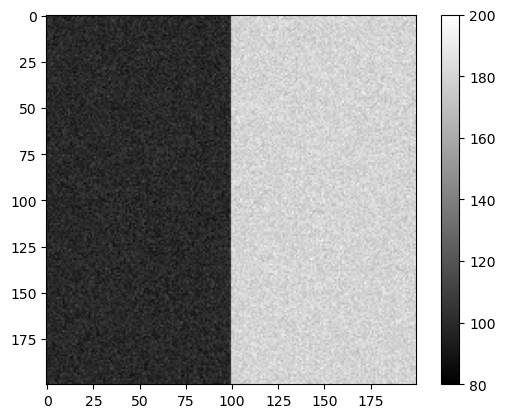

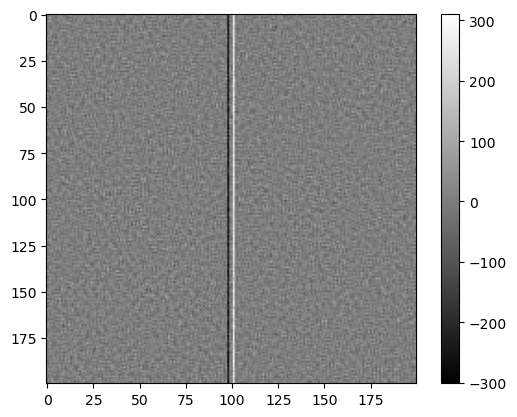

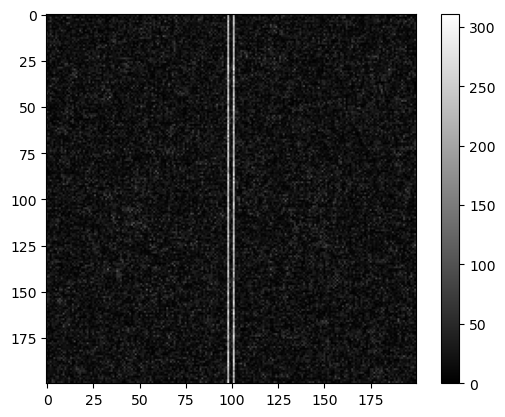

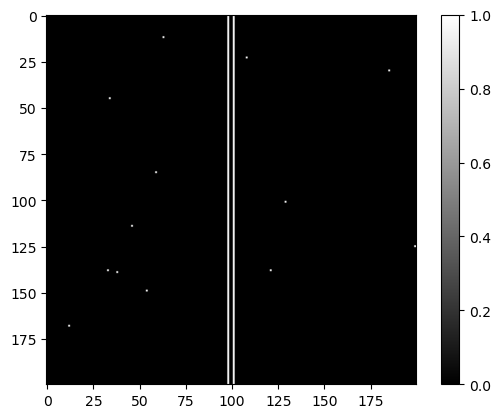

(<Figure size 640x480 with 2 Axes>,
 None)

In [10]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
L=256

# Aici fac o imagine ideala

Y = 100*np.ones([200,200])
Y[:,100:200]=180

MASK = np.zeros([200,200])
MASK[:,99:101]=1

# aici adaug zgomot imaginii ideale de luminanta
dims=np.shape(Y)
Lines=dims[0]
Columns=dims[1]

Yzg=Y+np.random.normal(0,5,[Lines,Columns])
for i in range(0,Lines):
    for j in range(0, Columns):
        if (Yzg[i,j]>L-1):
            Yzg[i,j]=L-1
        else:
            if (Yzg[i,j]<0):
                Yzg[i,j]=0

Yzg=np.uint8(Yzg)
plt.figure(),plt.imshow(Yzg,cmap='gray'),plt.colorbar(),plt.show()

from scipy import signal
Yzg = signal.convolve2d(Yzg,np.array([[1,1,1],[1,1,1],[1,1,1]]),boundary='symm', mode='same')
#Yzg = signal.convolve2d(Yzg,np.ones([5,5])/25,boundary='symm', mode='same')

Ylapl = signal.convolve2d(Yzg,np.array([[0,-1,0],[-1,4,-1],[0,-1,0]]),boundary='symm', mode='same')

plt.figure(),plt.imshow(Ylapl,cmap='gray'),plt.colorbar(),plt.show()
plt.figure(),plt.imshow(np.abs(Ylapl),cmap='gray'),plt.colorbar(),plt.show()
plt.figure(),plt.imshow(np.abs(Ylapl)>100,cmap='gray'),plt.colorbar(),plt.show()


### Cum fac zero-crossing ?
Teoria lui Marr spune ca trecerea prin zero a laplacianului marcheaza centrul conturului. Trebuie deci sa identificam pentru fiecare pixel daca in jurul sau (deci in vecinatatea sa 3 x 3) laplacianul isi modifica semnul.

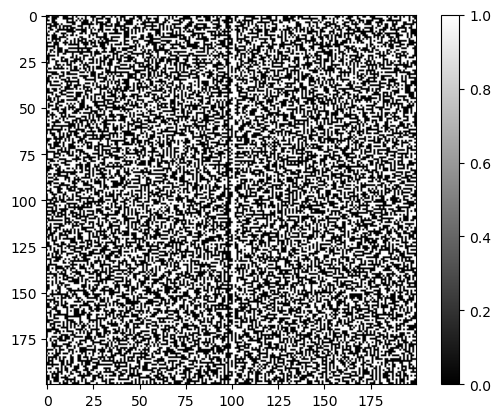

(4, 40000)
(200, 200)


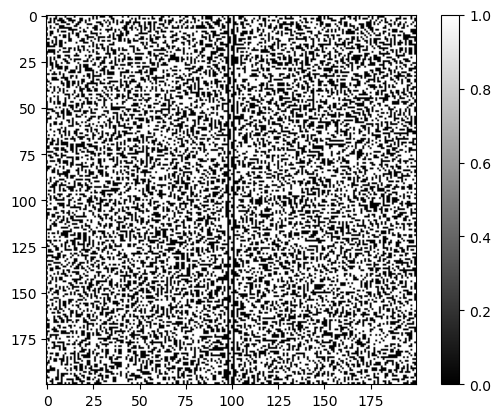

[ True  True False]


In [11]:
plt.figure(),plt.imshow(Ylapl>0,cmap="gray"),plt.colorbar(),plt.show()

Ylaplq1 = signal.convolve2d(Ylapl,np.array([[1,1,0],[1,1,0],[0,0,0]]),boundary='symm', mode='same')
Ylaplq2 = signal.convolve2d(Ylapl,np.array([[0,1,1],[0,1,1],[0,0,0]]),boundary='symm', mode='same')
Ylaplq3 = signal.convolve2d(Ylapl,np.array([[0,0,0],[1,1,0],[1,1,0]]),boundary='symm', mode='same')
Ylaplq4 = signal.convolve2d(Ylapl,np.array([[0,0,0],[0,1,1],[0,1,1]]),boundary='symm', mode='same')

dummy=np.array([np.ndarray.flatten(Ylaplq1[:]),np.ndarray.flatten(Ylaplq2[:]),np.ndarray.flatten(Ylaplq3[:]),np.ndarray.flatten(Ylaplq4[:])])
print(np.shape(dummy))
dM=np.max(dummy,axis=0)
dm=np.min(dummy,axis=0)
contur=np.reshape((dM*dm<0),(Lines, Columns))
print(np.shape(contur))

plt.figure(),plt.imshow(contur,cmap="gray"),plt.colorbar(),plt.show()
print(contur[100,99:102])


## Operatori morfologici
Gradientul morfologic este max-min

(300, 400)
(301, 401)


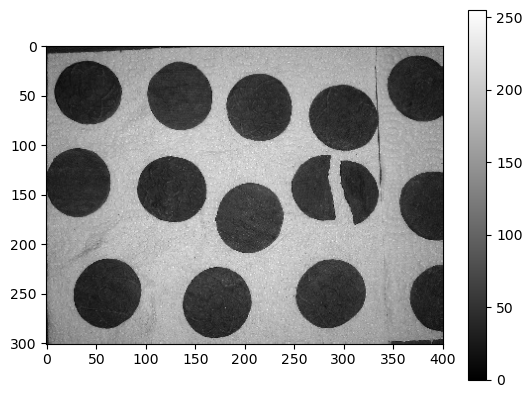

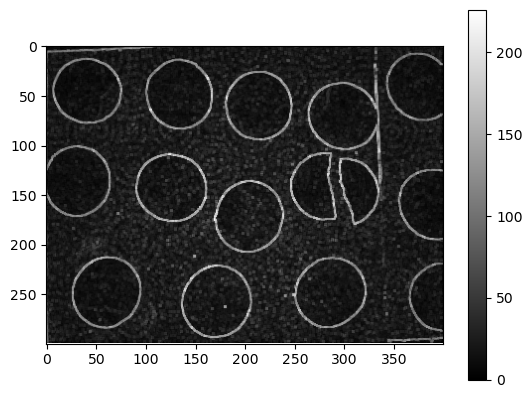

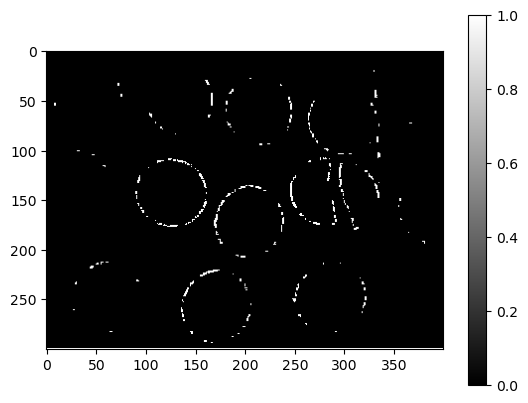

(<Figure size 640x480 with 2 Axes>,
 None)

In [12]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
L=256

img=io.imread('biscuiti.jpg')
dims=np.shape(img)
print(dims)

Lines=dims[0]
Columns=dims[1]

Y=img[0:Lines,0:Columns]

#bordare pe ultima linie si coloana
YY=np.zeros([Lines+1, Columns+1])
YY[0:Lines,0:Columns]=Y
YY[Lines,0:Columns]=Y[Lines-1,:]
YY[0:Lines,Columns]=Y[:,Columns-1]
YY[Lines,Columns]=Y[Lines-1,Columns-1]
print(np.shape(YY))

plt.figure(),plt.imshow(YY,cmap='gray'),plt.colorbar(),plt.show()

img_min=np.zeros([Lines, Columns])
img_max=np.zeros([Lines, Columns])

for l in range(0,Lines):
    for c in range(0,Columns):
        img_min[l,c]=np.min(np.ndarray.flatten(YY[l-1+1:l+2+1,c-1+1:c+2+1]))
        
for l in range(0,Lines):
    for c in range(0,Columns):
        img_max[l,c]=np.max(np.ndarray.flatten(YY[l-1+1:l+2+1,c-1+1:c+2+1]))

plt.figure(),plt.imshow(img_max-img_min,cmap='gray'),plt.colorbar(),plt.show()
plt.figure(),plt.imshow(img_max-img_min>150,cmap='gray'),plt.colorbar(),plt.show()

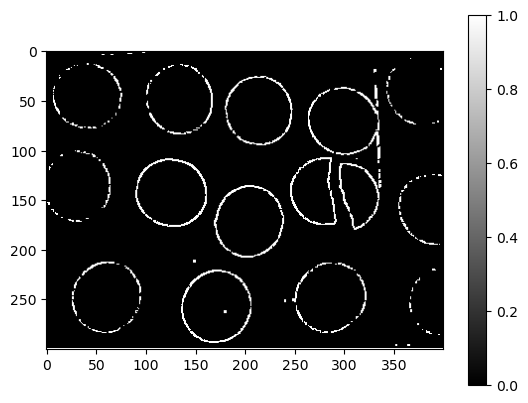

(<Figure size 640x480 with 2 Axes>,
 None)

In [16]:
plt.figure(),plt.imshow(img_max-img_min>120,cmap='gray'),plt.colorbar(),plt.show()

## Tema
Modificati codul anterior pentru a realiza operatia de gradient morfologic dupa alte tipuri de elemente structurante (de exemplu orientate).
Modificati codul anterior pentru a realiza operatiile de contur exterior, si respectiv contur interior.

## Tema
Cum putem separa contururi individuale (operatii de post-procesare a hartii binare de contururi: eliminare puncte izolate, conectare contururi intrerupte, etichetare)